## Overview
In this lab, we developed a routine in Python to take an input nucleic acid sequence, run RNAfold to obtain a secondary structure, and obtain a graphical representation of the folded RNA. Our goal is to verify that the sequences from the Penchovsky and Breaker “Computational design and experimental validationof oligonucleotide-sensing allosteric ribozymes” paper fold as the paper states. We pull the sequences from the paper and conduct a first-pass analysis of the sequences using RNA fold fro, the Vienna RNA package.

## Paper Analysis
* Blue regions of the riboswitches represent the OBS. When they are bound, consider that site to be receiving a TRUE input. The absence of OBS binding is a FALSE input.

* Red regions of the riboswitches are the sites responsible for self-cleavage. When the two red regions are aligned and bound to each other, consider that to be a TRUE output.When the red regions are not exactly bound, consider that to be a FALSE output.

## Questions
** Will the AND-1 riboswitch cleave itself when both of its OBS are bound?** Yes  
** Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?** No  
** What behavior do we expect from the YES-1 riboswitch?** When the OBS is bound, the site will receive a TRUE input.

## Grabbed sequences from the paper
We did not find the sequences listed anywhere so we manually curated the sequences from the paper.

**YES-1 (Figure 2a):** GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC  
**NOT-1 (Figure 4a):** GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC  
**AND-1 (Figure 5a):** GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU    
**OR-1 (Figure 6a):**
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC  

In [21]:
yes_1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"
not_1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"
and_1 = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"
or_1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

## Table with riboswitch information
For each riboswitch, we produced a table that contains:  
(1) riboswitch name  
(2) start and end coordinates of OBS-1 (blue region)  
(3) start and end coordinates of OBS-2 (blue region, only applicable to AND-1 and OR-1)  
(4) start and end coordinates of the two red regions

In [22]:
from IPython.display import HTML, display
import tabulate
table = [["Ribozyme", "OBS-1 start", "OBS-1 end", "OBS-2 start", "OBS-2 end", "Red region 1 start", "Red region 1 start", "Red region 2 start", "Red region 2 end"],
        ["YES-1", 26, 47,"-","-", 16, 21, 49, 54],
         ["NOT-1", 44, 66,"-","-", 40, 44, 74,78],
         ["AND-1", 30, 45, 49, 65, 16, 23, 70, 77],
         ["OR-1", 27, 46, 47, 66, 16, 26, 67, 77]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Ribozyme,OBS-1 start,OBS-1 end,OBS-2 start,OBS-2 end,Red region 1 start,Red region 1 start,Red region 2 start,Red region 2 end
YES-1,26,47,-,-,16,21,49,54
NOT-1,44,66,-,-,40,44,74,78
AND-1,30,45,49,65,16,23,70,77
OR-1,27,46,47,66,16,26,67,77


## Wrote a routine to run RNAfold from Python
(1) Start by generating one plot per riboswitch (YES-1, NOT-1, AND-1, and OR-1) with default parameters.

In [27]:
# YES-1 Plot
import subprocess
import matplotlib.image as mpimg

proc = subprocess.run(['RNAfold'], input = bytes(yes_1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
print(proc2.stderr)
proc3 = subprocess.call('convert rna.ps rna_yes_1.png', shell=True)
print(proc3)

img = mpimg.imread('rna_yes_1.png')
imgplot = plt.imshow(img)
plt.show()

a = subprocess.run(['ls'], stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
print(a.stdout)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [19]:
# NOT-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(not_1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_not_1.png', shell=True)
img = mpimg.imread('rna_not_1.png')
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified

<img src="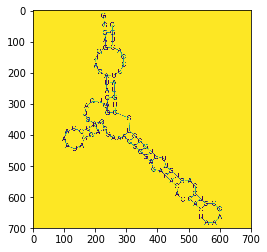&#10;" class="unconfined" alt="Drawing" style="width: 500px;"/>

In [20]:
# AND-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(and_1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_and_1.png', shell=True)
img = mpimg.imread('rna_and_1.png')
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [24]:
# OR-1 Plot
proc = subprocess.run(['RNAfold'], input = bytes(or_1, 'ascii'), stdout=subprocess.PIPE, stderr=subprocess.PIPE,check=True)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1.png', shell=True)
img = mpimg.imread('rna_or_1.png')
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: [WinError 2] The system cannot find the file specified

Compare each plot to the native conformation given in the publication. Are they the same? Are they different? Are there any stem-loop structures that don’t match up?Whatmight explain the differences? See if you can track down the parameters the authors used and compare them to the default RNAfold parameters (e.g., temperature, algorithm, etc).

In [10]:
proc = subprocess.run('RNAfold -C yes_1_constraints.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_yes_1_constraints.png', shell=True)
img = mpimg.imread('rna_yes_1_constraints.png')
imgplot = plt.imshow(img)
plt.show()

CalledProcessError: Command 'RNAfold -C yes_1_constraints.txt' returned non-zero exit status 1

Now, fold YES-1 again with constraints and see what you get. Does it look like the self-cleaving form of YES-1 in Figure 2? Are the red regions bound to each other? Do the same for NOT-1.

b'GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGxxxxxxxxxxxxxxxxxxxxxxGUGUUUUGCGUCCUGUAUUCCACUGC\n.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....)))) (-20.00)\n'


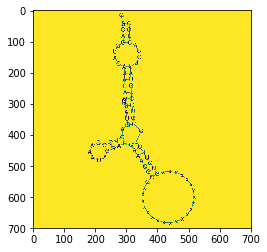

In [27]:
proc = subprocess.run('RNAfold -C not_1_constraints.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_not_1_constraints.png', shell=True)
img = mpimg.imread('rna_not_1_constraints.png')
imgplot = plt.imshow(img)
plt.show()

# Produce the constraint files, run RNAfold, and compare the output files to the paper.Determine whether the red regions (which you noted in your table above) pair with each other for each of the four possible input combinations. Generate a truth table for the AND-1 and the OR-1 riboswitches based on your results.According to your results, do the AND-1 and OR-1 riboswitches work as the paperclaims?

b'GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU\n((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).))))))))......... (-33.90)\n'


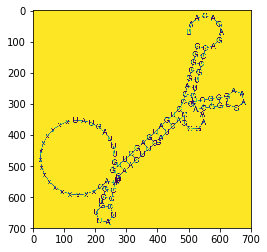

In [30]:
proc = subprocess.run('RNAfold -C and_1_constraintsTF.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_and_1_constraintsTF.png', shell=True)
img = mpimg.imread('rna_and_1_constraintsTF.png')
imgplot = plt.imshow(img)
plt.show()

b'GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU\n(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).))))))))......... (-29.60)\n'


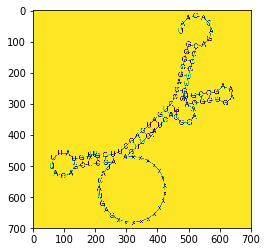

In [31]:
proc = subprocess.run('RNAfold -C and_1_constraintsFT.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_and_1_constraintsFT.png', shell=True)
img = mpimg.imread('rna_and_1_constraintsFT.png')
imgplot = plt.imshow(img)
plt.show()

b'GGGCGACCCUGAUGAGCUUGGUUUAGUAUxxxxxxxxxxxxxxxxGAGxxxxxxxxxxxxxxxxAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU\n((((((((((((((((((..............................................))))).))))).....(((((....))))).))))))))......... (-27.54)\n'


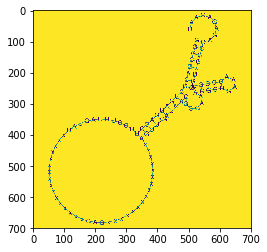

In [32]:
proc = subprocess.run('RNAfold -C and_1_constraintsTT.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_and_1_constraintsTT.png', shell=True)
img = mpimg.imread('rna_and_1_constraintsTT.png')
imgplot = plt.imshow(img)
plt.show()

TF, FT, FF constraints for RNA_or_1

b'GGGCGACCCUGAUGAGCUUGGUUGAGxxxxxxxxxxxxxxxxxxxxAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC\n((((((((((((((((((((((.(((...........................)))...)).))))))).))))).....(((((....))))).)))))))) (-33.10)\n'


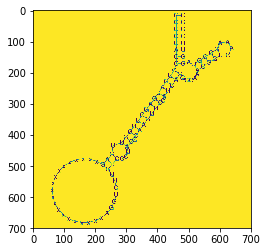

b'GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC\n((((((((.......(((((((((((........................................)))))))))))...(((((....))))).)))))))) (-29.09)\n'


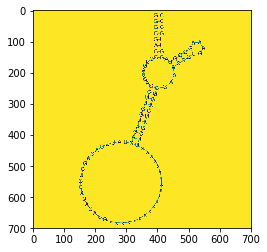

b'GGGCGACCCUGAUGAGCUUGGUUGAGxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC\n((((((((.......((((((((((..........................................))))))))))...(((((....))))).)))))))) (-28.84)\n'


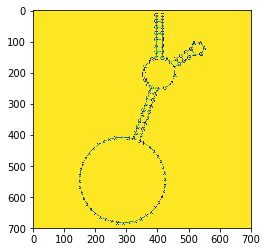

In [37]:
proc = subprocess.run('RNAfold -C or_1_constraintsTF.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1_constraintsTF.png', shell=True)
img = mpimg.imread('rna_or_1_constraintsTF.png')
imgplot = plt.imshow(img)
plt.show()
proc = subprocess.run('RNAfold -C or_1_constraintsFT.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1_constraintsFT.png', shell=True)
img = mpimg.imread('rna_or_1_constraintsFT.png')
imgplot = plt.imshow(img)
plt.show()
proc = subprocess.run('RNAfold -C or_1_constraintsTT.txt', stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True, shell=True)
print(proc.stdout)
proc2 = subprocess.run(['RNAplot'], input=proc.stdout, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
proc3 = subprocess.call('convert rna.ps rna_or_1_constraintsTT.png', shell=True)
img = mpimg.imread('rna_or_1_constraintsTT.png')
imgplot = plt.imshow(img)
plt.show()